In [1]:
import pandas as pd, numpy as np

In [2]:
results = pd.read_csv('l1_l2.csv')

In [3]:
results.shape

(195175, 19)

In [4]:
results.head()

,ITM_ID,GTIN,PMY_DPT_CD,PMY_DPT_DSC,REC_DPT_CD,REC_DPT_DSC,DPT_CD,DPT_DSC,COM_CD,COM_DSC,SUBCOM_CD,SUBCOM_DSC,VND_ECOM_DSC,Source,Actual Level 2,Actuals,Predictions,Scores,l1_l2
0,747914864.0,3.077205e+10,1.0,GROCERY,1.0,GROCERY,80.0,GROC NON-EDIBLE,103.0,DISHWASH DETERGENTS,37716.0,LIQUID DISH DETERGENT,Dawn Antibacterial EZ-Squeeze Dishwashing Liqu...,Test,Cleaning & Janitorial + Cleaning Chemicals,Cleaning & Janitorial + Cleaning Chemicals,Cleaning & Janitorial + Cleaning Chemicals,0.9991700988927781,Food / Beverages + Dairy & Egg Products
1,744355938.0,7.174897e+11,3.0,DRUG/GM,3.0,HBC,16.0,BEAUTY,813.0,COLOR COSMETICS,61083.0,MILANI,Milani Orange Gina Clr Sttmnt Lipstick .14oz,Test,Health & Beauty + Cosmetics & Fragrances,Health & Beauty + Cosmetics & Fragrances,Health & Beauty + Cosmetics & Fragrances,0.9999913531070369,Food / Beverages + Dairy & Egg Products
2,743758002.0,8.947710e+11,10.0,DELI/BAKE,49.0,SPECIALTY CHS,55.0,PKG SPECIALTY,455.0,DELI SPECIALTIES (RETAIL PK),46270.0,SPECIALTY CRACKERS,34 Degrees Sesame Crisps,Test,Food / Beverages + Grocery,Food / Beverages + Grocery,Food / Beverages + Grocery,0.9999700700491345,Health & Beauty + Personal Care
3,743633171.0,7.127931e+10,7.0,PRODUCE,19.0,FRESH PRODUCE,57.0,VEGETABLES,640.0,SALAD MIX,98104.0,KITS,Pear Gorgonzola,Test,Food / Beverages + Produce,Food / Beverages + Produce,Food / Beverages + Produce,0.8769365982097823,Health & Beauty + Personal Care
4,745892316.0,2.149601e+10,3.0,DRUG/GM,87.0,GM,41.0,GARDEN-OUTDOOR,894.0,GARDEN TOOLS/HDW,91223.0,GRASS SEED,Pennington Seed One Step Complete Bermuda Full...,Test,Gardening & Outdoors + Gardening,Gardening & Outdoors + Gardening,Gardening & Outdoors + Gardening,0.9585935516899028,Health & Beauty + Vitamins & Dietary Supplements


In [5]:
results['Scores'] = results['Scores'].str.strip('[]').astype(float)

In [6]:
results['Outcome'] = (results.Actuals == results.Predictions).astype(int)

In [7]:
results['L1_Outcome'] = (results.Actuals.fillna('').apply(lambda x: x.split('+')[0])  ==\
                         results.Predictions.fillna('').apply(lambda x: x.split('+')[0])).astype(int)

In [8]:
results_train = results[results.Source == 'Train']
results_test = results[results.Source == 'Test']

### L1-L2 accuracy

In [9]:
train_accuracy = 100*results_train.Outcome.sum()/len(results_train)
train_accuracy

98.22173383904624

In [10]:
test_accuracy = 100*results_test.Outcome.sum()/len(results_test)
test_accuracy

89.33961171793585

In [11]:
from sklearn.metrics import classification_report

In [12]:
test_metrics = pd.DataFrame(classification_report(results_test.Actuals, results_test.Predictions, output_dict= True)).T

C:\Users\iny8251\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iny8251\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iny8251\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iny825

In [99]:
test_metrics

,precision,recall,f1-score,support
Apparel + Clothing,0.963415,0.908046,0.934911,87.000000
Apparel + Footwear,0.833333,0.714286,0.769231,7.000000
Apparel + Personal Accessories,0.333333,0.285714,0.307692,28.000000
Apparel + Safety Apparel,0.800000,1.000000,0.888889,4.000000
Appliances + Microwaves,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...
Toys / Games / Hobbies + Toy Figures,0.761905,0.792079,0.776699,101.000000
Toys / Games / Hobbies + Toy Vehicles,0.764706,0.838710,0.800000,31.000000
accuracy,0.893396,0.893396,0.893396,0.893396
macro avg,0.615835,0.556434,0.566858,25909.000000


In [101]:
#test_metrics.to_csv('L1_L2_Test_Metrics_082223.csv')

### Confidence Intervals for accuracy 

In [17]:
from scipy.stats import bootstrap

In [54]:
results_test['L1_L2_sample_size'] = results_test['l1_l2'].map(dict(results_test.groupby('l1_l2').size()))

C:\Users\iny8251\AppData\Local\Temp\ipykernel_18864\4195975011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_test['L1_L2_sample_size'] = results_test['l1_l2'].map(dict(results_test.groupby('l1_l2').size()))


### Confidence interval cannot be estimated if sample size is too low, so we filter those out

In [56]:
results_test_filtered = results_test[results_test.L1_L2_sample_size >= 20]

In [61]:
# % of data with >= 20 samples per L1_L2
100*len(results_test_filtered)/len(results_test)

97.36385039947508

In [100]:
accuracy_confidence = pd.DataFrame(results_test_filtered.groupby('l1_l2')\
.apply(lambda x: bootstrap((x.Outcome,), np.mean, confidence_level=0.95).confidence_interval), columns=['Estimated_Accuracy_Range'])\
.reset_index(drop = False)
accuracy_confidence['Accuracy_Lower_Bound'] = accuracy_confidence.Estimated_Accuracy_Range.apply(lambda x: x[0])
accuracy_confidence['Confidence_Interval_Size'] = accuracy_confidence.Estimated_Accuracy_Range.apply(lambda x: x[1]-x[0])
accuracy_confidence['Sample_Size'] = accuracy_confidence.l1_l2.map(dict(results_test.groupby('l1_l2').size()))

In [101]:
accuracy_confidence


,l1_l2,Estimated_Accuracy_Range,Accuracy_Lower_Bound,Confidence_Interval_Size,Sample_Size
0,Apparel + Clothing,"(0.75, 0.9166666666666666)",0.750000,0.166667,72
1,Apparel + Personal Accessories,"(0.6153846153846154, 0.9230769230769231)",0.615385,0.307692,26
2,Appliances + Small Appliances,"(0.76, 0.96)",0.760000,0.200000,50
3,"Automotive + Fluids, Chemicals, Compounds","(0.6060606060606061, 0.9090909090909091)",0.606061,0.303030,33
4,Beer / Wine / Spirits + Beer,"(0.8715953307392996, 0.914396887159533)",0.871595,0.042802,771
5,Beer / Wine / Spirits + Ciders & Perrys,"(0.7857142857142857, 1.0)",0.785714,0.214286,28
6,Beer / Wine / Spirits + Flavored Alcoholic Bev...,"(0.8382352941176471, 0.9705882352941176)",0.838235,0.132353,68
7,Beer / Wine / Spirits + Spirits,"(0.8740601503759399, 0.924812030075188)",0.874060,0.050752,532
8,Beer / Wine / Spirits + Wine,"(0.875, 0.9104609929078015)",0.875000,0.035461,1128
9,Childcare + Baby Care,"(0.8294930875576036, 0.9216589861751152)",0.829493,0.092166,217


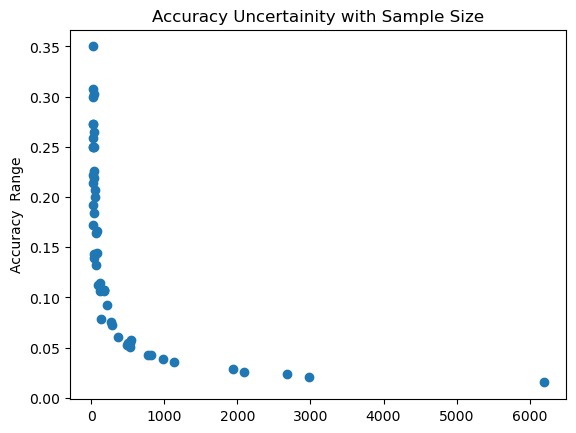

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ylabel("Accuracy  Range")
plt.title('Accuracy Uncertainity with Sample Size')
plt.scatter(accuracy_confidence.Sample_Size, accuracy_confidence.Confidence_Interval_Size)
plt.show()